In [1]:
import tensorflow as tf

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

In [2]:
from tensorflow.keras.datasets import mnist

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.flatten().reshape((x_train.shape[0], -1))
x_test = x_test.flatten().reshape((x_test.shape[0], -1))

x_train.shape, x_test.shape

11493376/11490434 [==============================] - 0s 0us/step


((60000, 784), (10000, 784))

In [3]:
from tensorflow.keras.layers import Input, Dense, Conv2D, BatchNormalization, MaxPooling2D

i = Input(shape = x_train[0].shape)
encode = Dense(64)(i)
encode = Dense(128)(encode)
decode = Dense(128)(encode)
decode = Dense(28*14)(decode)
o = Dense(28*28)(decode)

model = tf.keras.models.Model(i, o)

model.compile(optimizer = 'adam',
              loss = 'mse',
              metrics = ['mse','mae'])

In [4]:
r = model.fit(x_train, x_train, validation_data = (x_test, x_test),
              batch_size = 64, epochs = 20)

Epoch 1/20
938/938 [==============================] - 8s 8ms/step - loss: 0.0156 - mse: 0.0156 - mae: 0.0709 - val_loss: 0.0100 - val_mse: 0.0100 - val_mae: 0.0577
Epoch 2/20
938/938 [==============================] - 8s 8ms/step - loss: 0.0100 - mse: 0.0100 - mae: 0.0569 - val_loss: 0.0095 - val_mse: 0.0095 - val_mae: 0.0554
Epoch 3/20
938/938 [==============================] - 8s 8ms/step - loss: 0.0097 - mse: 0.0097 - mae: 0.0556 - val_loss: 0.0094 - val_mse: 0.0094 - val_mae: 0.0546
Epoch 4/20
938/938 [==============================] - 8s 8ms/step - loss: 0.0097 - mse: 0.0097 - mae: 0.0550 - val_loss: 0.0094 - val_mse: 0.0094 - val_mae: 0.0540
Epoch 5/20
938/938 [==============================] - 8s 8ms/step - loss: 0.0096 - mse: 0.0096 - mae: 0.0547 - val_loss: 0.0093 - val_mse: 0.0093 - val_mae: 0.0540
Epoch 6/20
938/938 [==============================] - 8s 8ms/step - loss: 0.0096 - mse: 0.0096 - mae: 0.0546 - val_loss: 0.0093 - val_mse: 0.0093 - val_mae: 0.0538
Epoch 7/20
938/9

In [5]:
model.layers

In [6]:
x_test[0].reshape((-1, 784)).shape

(1, 784)

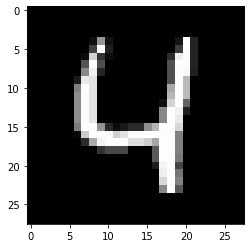

Encoded image:


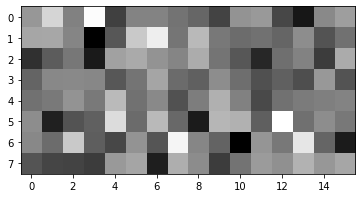

Decoded img:


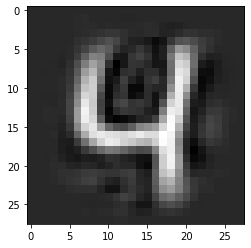

In [8]:
random_idx = np.random.randint(0, len(x_test)-1)
test_img = x_test[random_idx].reshape((-1, 784))
test_img_reshaped = test_img.reshape((28,28))

# show the image
plt.imshow(test_img_reshaped, cmap = 'gray')
plt.show()
# encode the image with first two layers of the model (excluding input layer)
data = model.layers[0](test_img)
data = model.layers[1](data)
data = model.layers[2](data)
print('Encoded image:')
encoded_img = data.numpy().reshape((8,16))
plt.imshow(encoded_img, cmap = 'gray')
plt.show()
print('Decoded img:')
for layer in model.layers[3:]:
  data = layer(data)

# reshape the decoded version
data = data.numpy().reshape((28,28))
plt.imshow(data, cmap = 'gray')
plt.show()